In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import lmfit
import corner

In [2]:
def Hz1(z1,H01,Om1,w0,w1):
    #Ode1=1.-Om
   #the redshift dependence of the dark energy density using Jassal parametrization w(z)=w_0 + w_1{z \over {(1+z)}^2}:
    I=((1+z1)**(3*(1+w0)))*np.exp((3*w1*z1**2)/(2*(1+z1)**2))
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
    HZ1 = H01*E
    return HZ1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [4]:
O_m=0.311
w_0=-1.3
w_1=0.28
H_0=67.66
#O_de=1.-O_m

In [5]:
#Hubble comoving parameter
Hz=Hz1(zs,H_0,O_m,w_0,w_1)/(1+zs)

In [6]:
#random error for Hz
error_sigma = 0.5
e1 = np.random.normal(0., error_sigma, Hz.shape)

In [7]:
H_zz= Hz + e1

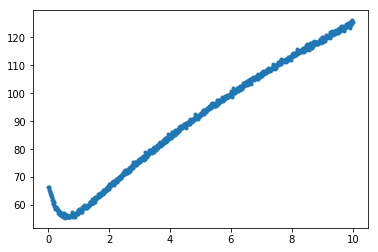

In [8]:
plt.plot(zs,H_zz, '.')

In [12]:
p = lmfit.Parameters()
p.add_many(('Om1',0.3,True,0.,2.),
           ('H01',70.,True,50.,100.),
           ('w0',-1.,True,-3.,3.),
           ('w1',0.2,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma

In [13]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1000
    # variables        = 4
    chi-square         = 973.149612
    reduced chi-square = 0.97705784
    Akaike info crit   = -19.2174453
    Bayesian info crit = 0.41357583
[[Variables]]
    Om1:  0.31199090 +/- 0.00223429 (0.72%) (init = 0.3)
    H01:  67.5464280 +/- 0.24121335 (0.36%) (init = 70)
    w0:  -1.24429278 +/- 0.03482822 (2.80%) (init = -1)
    w1:   0.02746996 +/- 0.18021909 (656.06%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om1, H01) = -0.999
    C(w0, w1)   = -0.981
    C(Om1, w0)  =  0.873
    C(H01, w0)  = -0.870
    C(Om1, w1)  = -0.805
    C(H01, w1)  =  0.798


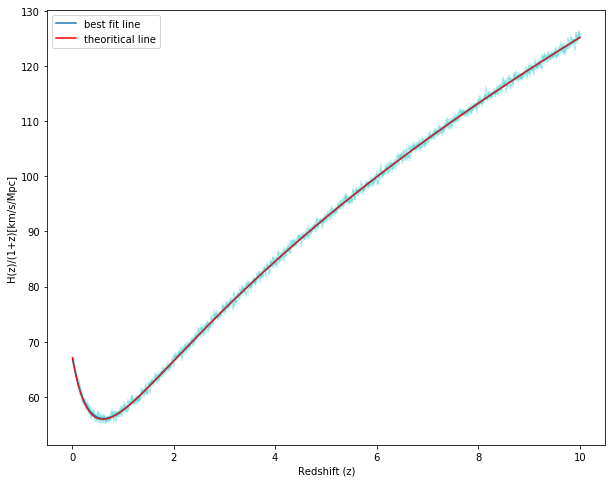

In [14]:
plt.figure(figsize=(10,8))
plt.errorbar(zs,H_zz,yerr=error_sigma,fmt='c',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestOm1 = mi.params.valuesdict()['Om1']
bestH01 = mi.params.valuesdict()['H01']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),'-',label="best fit line")
plt.plot(zs,Hz,'r',label="theoritical line")
plt.xlabel('Redshift (z)')
plt.ylabel('H(z)/(1+z)[km/s/Mpc]')
plt.legend(loc="upper left")
lmfit.report_fit(mi)

In [15]:
residuals=H_zz-Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs)

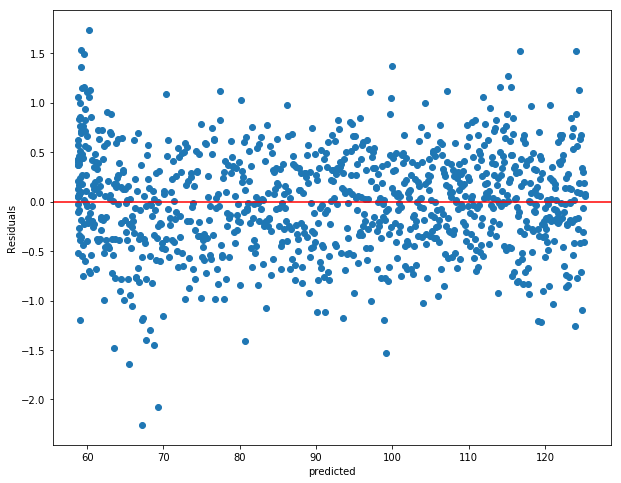

In [36]:
plt.figure(figsize=(10,8))
plt.plot(Hz1(zs,bestH01,bestOm1,bestw0,bestw1)/(1+zs),residuals,'o')
plt.xlabel('predicted')
plt.ylabel('Residuals')
plt.axhline(y=0., color='r', linestyle='-')
plt.show()

In [14]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

emcee: Exception while calling your likelihood function:
  params: [ 0.28640263 70.52085801  0.2049611 ]
  args: (<function residual at 0x7f119286b7d0>, Parameters([('Om1', <Parameter 'Om1', 0.2864026333095572, bounds=[0.0:2.0]>), ('H01', <Parameter 'H01', 70.5208580115633, bounds=[50.0:100.0]>), ('w0', <Parameter 'w0', value=-1.3 (fixed), bounds=[-3.0:3.0]>), ('w1', <Parameter 'w1', 0.2049611022082054, bounds=[-2.0:2.0]>)]), ['Om1', 'H01', 'w1'], array([[  0.,   2.],
       [ 50., 100.],
       [ -2.,   2.]]))
  kwargs: {'nan_policy': 'omit', 'userkws': {}, 'userargs': [], 'is_weighted': True, 'float_behavior': 'posterior'}
  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/alexandra/.local/lib/python2.7/site-packages/lmfit/minimizer.py", line 2015, in _lnpost
    out = userfcn(params, *userargs, **userkwargs)
  File "<ipython-input-9-889a3a58e787>", line 9, in residual
    return (Hz1(zs,v['H01'],v['Om1'],v['w0'],v['w1'])/(1+zs)-H_zz)/error_sigma
  File "<ipython-input-2-a8a4a8154213>", line 5, in Hz1
    E = np.sqrt((Om1*(1+z1)**3.) + (1-Om1)*I)
KeyboardInterrupt


KeyboardInterrupt: 

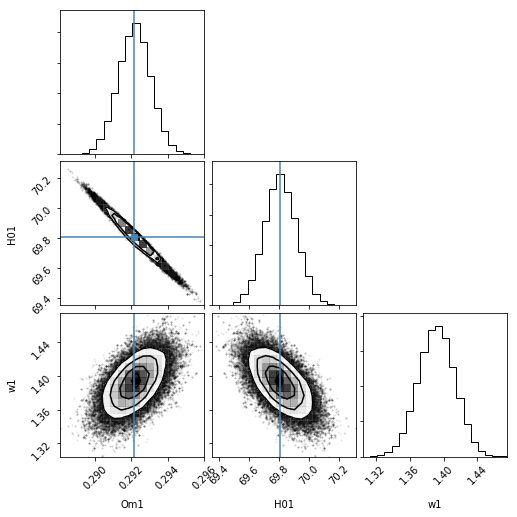

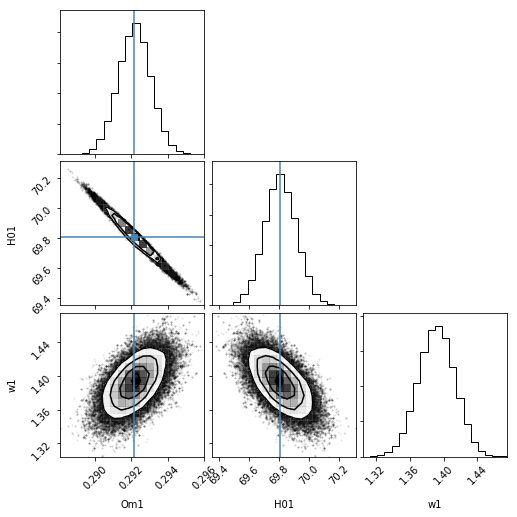

In [43]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))